# Using  the Interquartile Range (IQR) to Detect Outliers in the Data

## Introduction

Pre-requisite: Interquartile Range (IQR)


Recall that the **Interquartile range (IQR)** is the difference between the 75th percentile (0.75 quantile) and the 25th percentile (0.25 quantile). In the last tutorial, we learned how to compute the interquartile range from scratch.  

&nbsp;

**But how is the IQR going to help you for Data Science?**

One practical use of the IQR is to detect outliers in your data. The general rule is that outliers are observations that fall:  
  - below **25th percentile - 1.5 * IQR**, or  
  - above **75th percentile + 1.5 * IQR**

In fact, when you create a box plot from the data, this is exactly what you see


<img src="img/box_plot_ref_needed.png" width="600px"/>
<center>Image source: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51</center>

&nbsp;

In this tutorial, we will use the IQR method to see which countries in the World are outliers in terms of wealth.

## Practice

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1 - Dataset

For this tutorial, we will use the GDP per capita in 2018 ($USD). The original data can be found [here](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD).  

According to [Investopedia](https://www.investopedia.com/terms/p/per-capita-gdp.asp), Per capita GDP is a global measure for gauging the prosperity of nations and is used by economists, along with GDP, to analyze the prosperity of a country based on its economic growth.

In [2]:
df = pd.read_csv("../data/gdp_per_capita.csv")
# using the GDP per capita in 2018, latest year available
df = df[['Country Name', '2018']] 
df = df.dropna()
df = df.rename(columns={
    'Country Name': 'country', 
    '2018':'gdp'
})
# Display the first rows of the dataframe
df.head()

,country,gdp
1,Afghanistan,520.896603
2,Angola,3432.385736
3,Albania,5268.848504
4,Andorra,42029.762737
5,United Arab Emirates,43004.953358


### 2 - IQR Outlier Detection Method

For a step-by-step breakdown of this function, refer to my previous post on Interquartile Range (IQR).

In [3]:
def get_percentile(df, percentile_rank):
    
    # First, sort by ascending gdp, reset the indices
    df = df.sort_values(by='gdp').reset_index()
    
    # Rule of three to get the index of the gdp
    index = (len(df.index)-1) * percentile_rank / 100.0
    index = int(index)
    
    # Return the gdp corresponding to the percentile rank
    # as well as the name of the corresponding country
    return (df.at[index, 'country'], df.at[index, 'gdp'])


def interquartile_range(df):
    
    c75, p75 = get_percentile(df, 75)  # 75th percentile country and gdp
    c25, p25 = get_percentile(df, 25)  # 25th percentile country and gdp
    iqr = p75 - p25  # Interquartile Range
    return iqr


First, comptute the interquartile range in terms of GDP per Capita. In 2017, the difference between the 25th  country and the 75th country in terms of GDP per capita  was around USD$ 17,306 per person.

In [4]:
iqr = interquartile_range(df)
iqr

17137.727817263032

Now detect the outliers

In [5]:
def get_outliers(df):
    
    # Compute the 25th percentile, the 75th percentile and the IQR
    c25, p25 = get_percentile(df, 25)
    c75, p75 = get_percentile(df, 75)
    iqr = interquartile_range(df)
    
    # "Minimum non-outlier value": 25th percentile - 1.5 * IQR
    min_val = p25 - 1.5*iqr
    # "Maximum non-outlier value": 75th percentile + 1.5 * IQR
    max_val = p75 + 1.5*iqr

    # Anything below the minimum or above the maximum becomes
    # an outlier
    outliers = df[(df['gdp'] < min_val) | (df['gdp'] > max_val)]
    return outliers

In [15]:
outliers = get_outliers(df)
outliers = outliers.sort_values(by='gdp', ascending=False)
outliers

,country,gdp
122,Monaco,185741.279992
117,Luxembourg,116597.295638
119,"Macao SAR, China",87208.535913
33,Switzerland,82828.797372
144,Norway,81734.465574
92,Ireland,78582.948100
95,Iceland,73368.117464
161,Qatar,68793.784437
168,Singapore,64581.944018
198,United States,62886.836485


As you can see, all of the outliers are **rich** countries. No poor country was considered to be an outlier. This is because the median GDP is at USD$ 6,631

In [16]:
c50, p50 = get_percentile(df, 50)
print("Median GDP per capita on earth = USD$ %s (%s)" % (int(p50), c50))

Median GDP per capita on earth = USD$ 6344 (Ecuador)


Because the IQR is at $17,306 (see above), the minimum non-outlier value is negative, which is impossible for a a Gross Domestic Product.

In [17]:
# "Minimum non-outlier value": 25th percentile - 1.5 * IQR
c25, p25 = get_percentile(df, 25)
min_val = p50 - 1.5*iqr
print("Minimum non-outlier value = $ %s" % int(min_val))

Minimum non-outlier value = $ -19361


However, the maximum non-outlier value is exceeded multiple times.

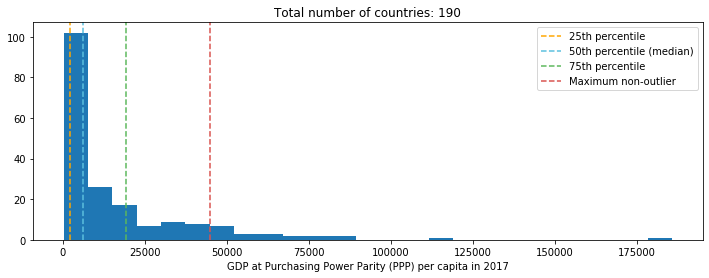

In [11]:
plt.figure(figsize=(12,4))
plt.hist(df['gdp'], bins=25)
plt.title("Total number of countries: %s" % len(df.index))
plt.xlabel("GDP at Purchasing Power Parity (PPP) per capita in 2017")

c75, p75 = get_percentile(df, 75)  # 75th percentile country and gdp
c50, p50 = get_percentile(df, 50)  # median country and gdp
c25, p25 = get_percentile(df, 25)  # 25th percentile country and gdp

# Vertical lines for each percentile of interest
plt.axvline(p25, linestyle='--', color='#ffa700', label='25th percentile')
plt.axvline(p50, linestyle='--', color='#5bc0de', label='50th percentile (median)')
plt.axvline(p75, linestyle='--', color='#5cb85c', label='75th percentile')

# Maximum non-outlier value
maxval = p75 + 1.5*iqr
plt.axvline(maxval, linestyle='--', color='#d9534f', label='Maximum non-outlier')

plt.legend(loc='best')
plt.show()

### In Conclusion

Using the IQR rule to detect outliers, we can see that, in 2018
  - no country in the world was *abnormally* poor compared to the rest, but
  - several countries were *abnormally* rich compared to the rest in terms of GDP per capita
  
Also notice how the median (in light blue) is closer to the lower quartile (25th percentile) than the upper quartile (75th percentile). This is because the data is skewed to the right: very few countries have a very high GDP per capita. This is an example of how statistics can show us that our generation still has a lot of work to do to address the problem disparity of wealth.